特徴量とクラスの相関関係を表示するプログラム（ワイン品質データ）

In [1]:
# Google Driveをマウント
from google.colab import drive
drive.mount('/content/drive')
# ライブラリインポート
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [4]:
# Load data
print("Data Loading")
# 読み込みフォルダパス
directory_name = '/content/drive/MyDrive/Colab Notebooks/AI-Kouza/dataset/winequality_data/'
file_name = 'winequality-red.csv'
wine_data = np.loadtxt(directory_name + file_name, delimiter=';', skiprows=1, dtype='float32')
X = wine_data[:, :11]  # features of wine based on physicochemical tests
y = wine_data[:, 11]   # quality
df = pd.read_csv(directory_name + file_name, sep=";", header=0)

sns.pairplot(df, hue='quality', palette='plasma', plot_kws={'alpha':0.8})
plt.show()


Output hidden; open in https://colab.research.google.com to view.

**ランダムフォレストを使用した11個の特徴量の重要度評価**

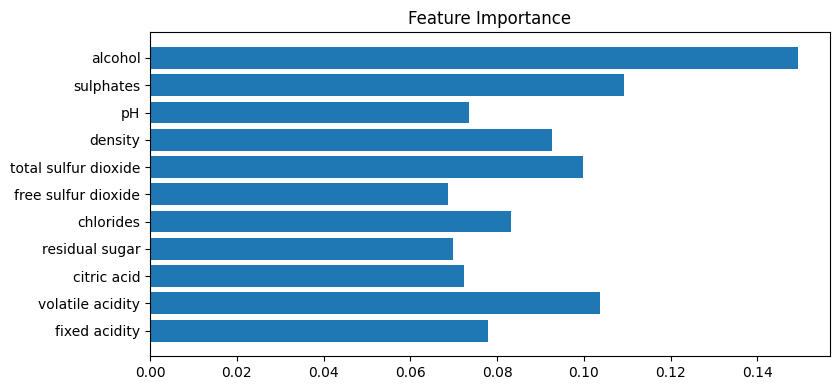

In [6]:
# ランダムフォレストモデル構築
rf_model = RandomForestClassifier()
rf_model.fit(X, y)
# 重要度取得
labels = df.columns[0:11]
importances = rf_model.feature_importances_
# 結果表示
fig = plt.figure(figsize=(8.5,4.0))
axs = fig.add_subplot(1,1,1)
axs.barh(y=range(len(importances)), width=importances)
axs.set_yticks(ticks=range(len(labels)), labels=labels)
axs.set_title('Feature Importance')
plt.tight_layout()
plt.show()
